# THIS NOTEBOOK MAKES THE ANALYSIS OF THE RESULTS OF TRAINING FOR EACH METHOD
#### (it is required to run Master_DataGen.ipynb and Master_ModelBenchmark.ipynb before)


In [1]:
## Initialise 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pylab as pylab
from tqdm import tqdm
import os

params = {'legend.fontsize': 'xx-large',
         'legend.title_fontsize': 'xx-large',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Colour palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=mpl.color_sequences['tab20']) 

In [2]:
# Results directory
results_dir = "D:/JCUENCA/ISGT2024_SimulationsJC/Results/"

# How many runs (max 10)
total_runs = 10

In [3]:
# Parameters for each run
datasets = ["a", "a_wSMOTE", "b", "b_wSMOTE", "c", "c_wSMOTE", "d", "d_wSMOTE", "e", "e_wSMOTE", "f", "f_wSMOTE"] 
save_dir = ["1k_OPs/", "10k_OPs/", "100k_OPs/", "1M_OPs/"]

### Collect results for each run

In [4]:
## Initialise dictionaries for results
resultsDT = {}
results_datasetDT = {}
resultsNN = {}
results_datasetNN = {}
resultsXG = {}
results_datasetXG = {}
## Initialise dictionaries for model size
results_modelsizeDT = {}
results_modelsizeNN = {}
results_modelsizeXG = {}
modelsizeDT = {}
modelsizeNN = {}
modelsizeXG = {}

## Data collection loop
for sizes in tqdm(range(len(save_dir))):
    results_datasetDT = {}
    results_datasetNN = {}
    results_datasetXG = {}
    results_modelsizeDT = {}
    results_modelsizeNN = {}
    results_modelsizeXG = {}
    for data in range(len(datasets)): 
        run_resultsDT = np.zeros([17,total_runs])
        run_resultsNN = np.zeros([17,total_runs])
        run_resultsXG = np.zeros([17,total_runs])
        run_model_sizeDT = np.zeros([total_runs])
        run_model_sizeNN = np.zeros([total_runs])
        run_model_sizeXG = np.zeros([total_runs])
        for run in range(total_runs):
            run_resultsDT[:,run] = np.loadtxt(open(results_dir + save_dir[sizes] + "Run" + str(run+1) + "/DT/" + datasets[data] + "/info.csv", "rb"), delimiter=",", skiprows=0)
            run_resultsNN[:,run] = np.loadtxt(open(results_dir + save_dir[sizes] + "Run" + str(run+1) + "/NN/" + datasets[data] + "/info.csv", "rb"), delimiter=",", skiprows=0)
            run_resultsXG[:,run] = np.loadtxt(open(results_dir + save_dir[sizes] + "Run" + str(run+1) + "/XG/" + datasets[data] + "/info.csv", "rb"), delimiter=",", skiprows=0)
            run_model_sizeDT[run] = os.path.getsize((results_dir + save_dir[sizes] + "Run" + str(run+1) + "/DT/" + datasets[data] + "/trained_DT.pickle"))
            run_model_sizeNN[run] = os.path.getsize((results_dir + save_dir[sizes] + "Run" + str(run+1) + "/NN/" + datasets[data] + "/trained_NN.keras"))
            run_model_sizeXG[run] = os.path.getsize((results_dir + save_dir[sizes] + "Run" + str(run+1) + "/XG/" + datasets[data] + "/trained_XG.pickle"))
        results_datasetDT.update({datasets[data] : run_resultsDT})
        results_datasetNN.update({datasets[data] : run_resultsNN})
        results_datasetXG.update({datasets[data] : run_resultsXG})
        results_modelsizeDT.update({datasets[data] : run_model_sizeDT})
        results_modelsizeNN.update({datasets[data] : run_model_sizeNN})
        results_modelsizeXG.update({datasets[data] : run_model_sizeXG})
    resultsDT.update({save_dir[sizes] : results_datasetDT})
    resultsNN.update({save_dir[sizes] : results_datasetNN})
    resultsXG.update({save_dir[sizes] : results_datasetXG})
    modelsizeDT.update({save_dir[sizes] : results_modelsizeDT})
    modelsizeNN.update({save_dir[sizes] : results_modelsizeNN})
    modelsizeXG.update({save_dir[sizes] : results_modelsizeXG})

## This is the order of the 17 outputs
## INFO_SIM = [t_train, acc_train, t_op_1, safe_precision_1, safe_recall_1, safe_f1_1, unsafe_precision_1, unsafe_recall_1, unsafe_f1_1, t_op_2, acc_val_1, safe_precision_2, safe_recall_2, safe_f1_2, unsafe_precision_2, unsafe_recall_2, unsafe_f1_2]


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.06s/it]


# Generate graphs


## Figure 4(a) Plots for model operational time

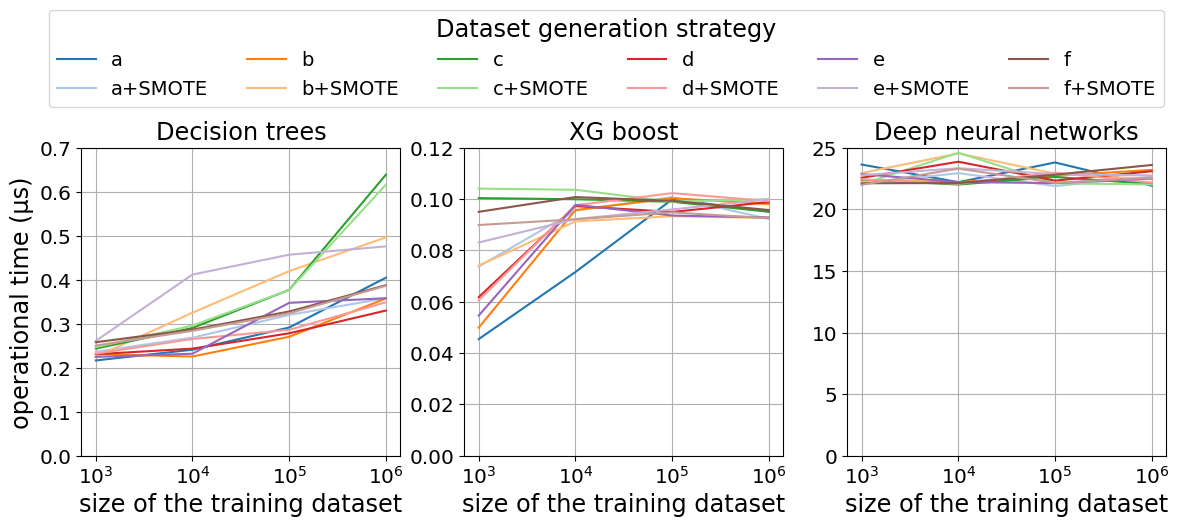

In [5]:
op_times_avgDT = np.zeros([len(datasets), len(save_dir)])
op_times_avgNN = np.zeros([len(datasets), len(save_dir)])
op_times_avgXG = np.zeros([len(datasets), len(save_dir)])

for data in range(len(datasets)): 
    for sizes in range(len(save_dir)):
        op_times_avgDT[data, sizes] = np.mean(resultsDT[save_dir[sizes]][datasets[data]][2,:])
        op_times_avgNN[data, sizes] = np.mean(resultsNN[save_dir[sizes]][datasets[data]][2,:])
        op_times_avgXG[data, sizes] = np.mean(resultsXG[save_dir[sizes]][datasets[data]][2,:])

## Create plot decision trees
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,4))
#fig.suptitle('Time it takes to evaluate one operational point using the models', fontsize=16)
plt.setp((ax1,ax2,ax3), xticks=[0, 1, 2, 3], xticklabels=['$10^3$', '$10^4$', '$10^5$', '$10^6$'])

ax1.plot(np.transpose(op_times_avgDT))
ax1.set(xlabel='size of the training dataset', ylabel='operational time (μs)',
       title='Decision trees', ylim=(0, 0.7))
ax1.grid()

## Create plot xgboost
ax2.plot(np.transpose(op_times_avgXG))
ax2.set(xlabel='size of the training dataset', #ylabel='training time (s)',
       title='XG boost', ylim=(0, 0.12))
ax2.grid()

## Create plot neural networks
ax3.plot(np.transpose(op_times_avgNN))
ax3.set(xlabel='size of the training dataset', #ylabel='training time (s)',
       title='Deep neural networks', ylim=(0, 25))
ax3.grid()

fig.legend(['a', 'a+SMOTE', 'b', 'b+SMOTE', 'c', 'c+SMOTE', 'd', 'd+SMOTE', 'e', 'e+SMOTE', 'f', 'f+SMOTE'], bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol=6, title="Dataset generation strategy", fontsize=14)

fig.savefig("Results/operational_times.png", bbox_inches='tight')
plt.show()

##  Figure 4(b) Plots for training time (x and y scale are logaritmic)

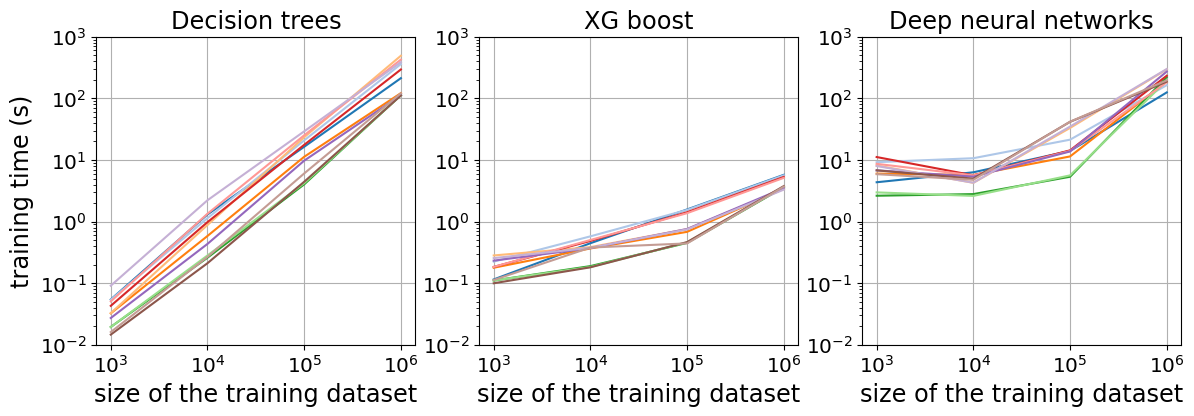

In [6]:
train_times_avgDT = np.zeros([len(datasets), len(save_dir)])
train_times_avgNN = np.zeros([len(datasets), len(save_dir)])
train_times_avgXG = np.zeros([len(datasets), len(save_dir)])

for data in range(len(datasets)): 
    for sizes in range(len(save_dir)):
        train_times_avgDT[data, sizes] = np.mean(resultsDT[save_dir[sizes]][datasets[data]][0,:])
        train_times_avgNN[data, sizes] = np.mean(resultsNN[save_dir[sizes]][datasets[data]][0,:])
        train_times_avgXG[data, sizes] = np.mean(resultsXG[save_dir[sizes]][datasets[data]][0,:])

## Create plot decision trees
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,4))
#fig.suptitle('Training times for different dataset sizes', fontsize=16)
plt.setp((ax1,ax2,ax3), xticks=[0, 1, 2, 3], xticklabels=['$10^3$', '$10^4$', '$10^5$', '$10^6$'], ylim=(0.01,1000))

ax1.plot(np.transpose(train_times_avgDT))
ax1.set(yscale='log', xlabel='size of the training dataset', ylabel='training time (s)',
       title='Decision trees')
ax1.grid()

## Create plot xgboost
ax2.plot(np.transpose(train_times_avgXG))
ax2.set(yscale='log', xlabel='size of the training dataset', 
       title='XG boost')
ax2.grid()


## Create plot Deep neural networks
ax3.plot(np.transpose(train_times_avgNN))
ax3.set(yscale='log', xlabel='size of the training dataset', 
       title='Deep neural networks')
ax3.grid()

#fig.legend(['a', 'a+SMOTE', 'b', 'b+SMOTE', 'c', 'c+SMOTE', 'd', 'd+SMOTE', 'e', 'e+SMOTE', 'f', 'f+SMOTE'], bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol=6, title="Dataset generation strategy", fontsize=14)

fig.savefig("Results/training_times.png", bbox_inches='tight')
plt.show()

##  Figure 5 Plots for model file size 

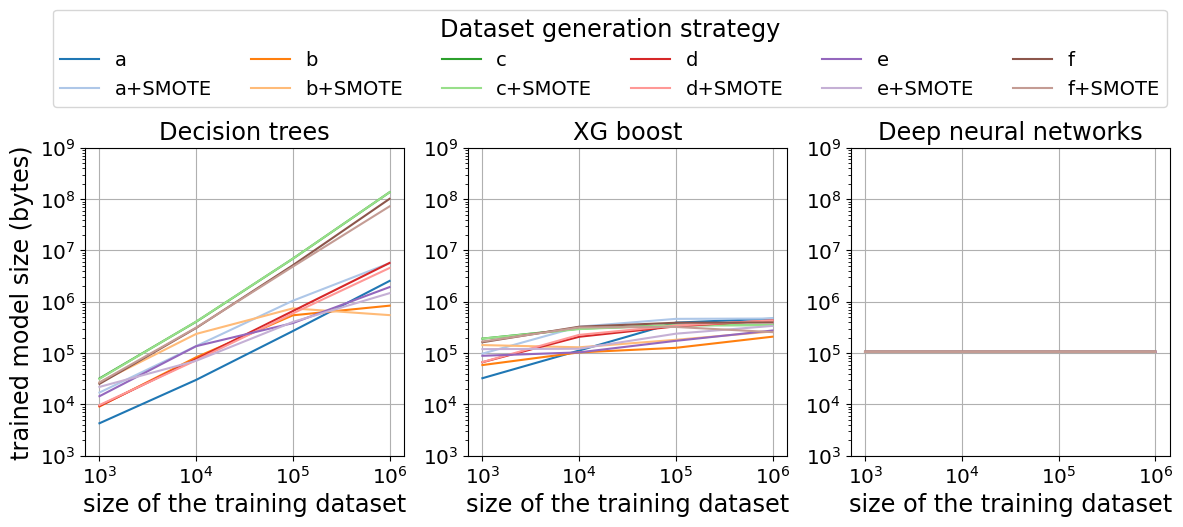

In [7]:
size_avgDT = np.zeros([len(datasets), len(save_dir)])
size_avgNN = np.zeros([len(datasets), len(save_dir)])
size_avgXG = np.zeros([len(datasets), len(save_dir)])

for data in range(len(datasets)): 
    for sizes in range(len(save_dir)):
        size_avgDT[data, sizes] = np.mean(modelsizeDT[save_dir[sizes]][datasets[data]][:])
        size_avgNN[data, sizes] = np.mean(modelsizeNN[save_dir[sizes]][datasets[data]][:])
        size_avgXG[data, sizes] = np.mean(modelsizeXG[save_dir[sizes]][datasets[data]][:])

## Create plot decision trees
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,4))
#fig.suptitle('Size of the models once trained', fontsize=16)
plt.setp((ax1,ax2,ax3), xticks=[0, 1, 2, 3], xticklabels=['$10^3$', '$10^4$', '$10^5$', '$10^6$'], ylim=(1000,1000000000))

ax1.plot(np.transpose(size_avgDT))
ax1.set(yscale='log', xlabel='size of the training dataset', ylabel='trained model size (bytes)',
       title='Decision trees')
ax1.grid()

## Create plot xgboost
ax2.plot(np.transpose(size_avgXG))
ax2.set(yscale='log', xlabel='size of the training dataset', #ylabel='training time (s)',
       title='XG boost')
ax2.grid()

## Create plot neural networks
ax3.plot(np.transpose(size_avgNN))
ax3.set(yscale='log', xlabel='size of the training dataset', #ylabel='training time (s)',
       title='Deep neural networks')
ax3.grid()



fig.legend(['a', 'a+SMOTE', 'b', 'b+SMOTE', 'c', 'c+SMOTE', 'd', 'd+SMOTE', 'e', 'e+SMOTE', 'f', 'f+SMOTE'], bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol=6, title="Dataset generation strategy", fontsize=14)

fig.savefig("Results/model_sizes.png", bbox_inches='tight')
plt.show()

##  Figure 6(a) Scatter plot for precision and recall (TEST 1 - random dataset)

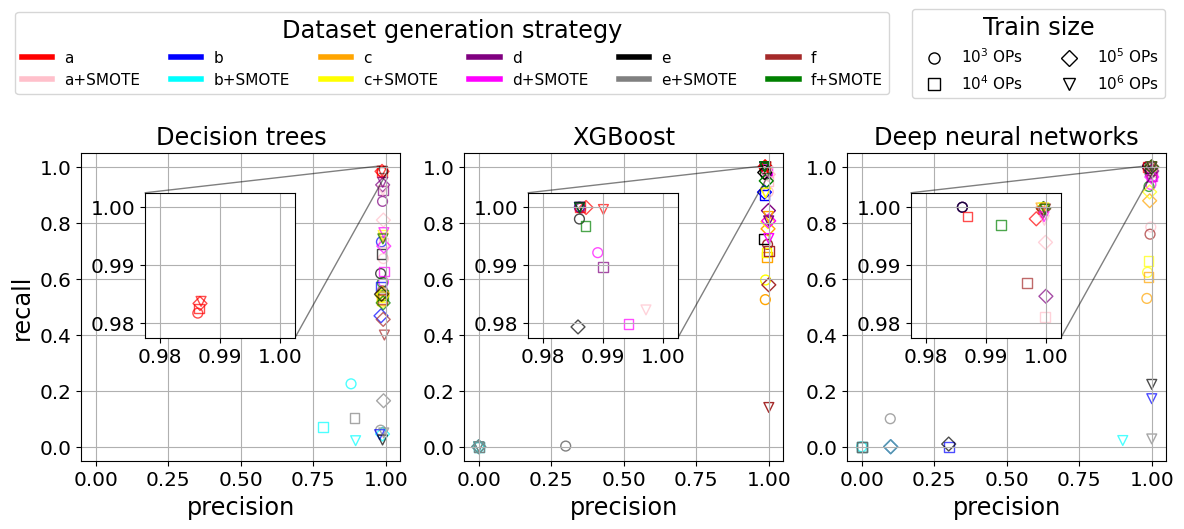

In [8]:
colors = np.array(["red","pink","blue","cyan","orange","yellow","purple","magenta","black","gray","brown","green"])

val1_unsafeprec_avgDT = np.zeros([len(datasets), len(save_dir)])
val1_unsafeprec_avgNN = np.zeros([len(datasets), len(save_dir)])
val1_unsafeprec_avgXG = np.zeros([len(datasets), len(save_dir)])
val1_unsaferecall_avgDT = np.zeros([len(datasets), len(save_dir)])
val1_unsaferecall_avgNN = np.zeros([len(datasets), len(save_dir)])
val1_unsaferecall_avgXG = np.zeros([len(datasets), len(save_dir)])

for data in range(len(datasets)): 
    for sizes in range(len(save_dir)):
        val1_unsafeprec_avgDT[data, sizes] = np.mean(resultsDT[save_dir[sizes]][datasets[data]][6,:])
        val1_unsafeprec_avgNN[data, sizes] = np.mean(resultsNN[save_dir[sizes]][datasets[data]][6,:])
        val1_unsafeprec_avgXG[data, sizes] = np.mean(resultsXG[save_dir[sizes]][datasets[data]][6,:])
        val1_unsaferecall_avgDT[data, sizes] = np.mean(resultsDT[save_dir[sizes]][datasets[data]][7,:])
        val1_unsaferecall_avgNN[data, sizes] = np.mean(resultsNN[save_dir[sizes]][datasets[data]][7,:])
        val1_unsaferecall_avgXG[data, sizes] = np.mean(resultsXG[save_dir[sizes]][datasets[data]][7,:])

## Create plot decision tree non-safe validation accuracy
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,4))
#fig.suptitle('Unsafe classification precision and recall for unsafe scenarios - test 1 (random)', fontsize=16)
plt.setp((ax1,ax2,ax3), ylim=(-0.05,1.05), xlim=(-0.05,1.05))

ax1.scatter(val1_unsafeprec_avgDT[:, 0],val1_unsaferecall_avgDT[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
ax1.scatter(val1_unsafeprec_avgDT[:, 1],val1_unsaferecall_avgDT[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
ax1.scatter(val1_unsafeprec_avgDT[:, 2],val1_unsaferecall_avgDT[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
ax1.scatter(val1_unsafeprec_avgDT[:, 3],val1_unsaferecall_avgDT[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)

ax1.set(xlabel='precision', ylabel='recall',
       title='Decision trees')
ax1.grid()
# Create inset
axins1 = ax1.inset_axes([0.2, 0.4, 0.47, 0.47], xlim=(0.9775, 1.0025), ylim=(0.9775,1.0025), xticks=[0.98, 0.99, 1], yticks=[0.98, 0.99, 1])
axins1.scatter(val1_unsafeprec_avgDT[:, 0],val1_unsaferecall_avgDT[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
axins1.scatter(val1_unsafeprec_avgDT[:, 1],val1_unsaferecall_avgDT[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
axins1.scatter(val1_unsafeprec_avgDT[:, 2],val1_unsaferecall_avgDT[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
axins1.scatter(val1_unsafeprec_avgDT[:, 3],val1_unsaferecall_avgDT[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
axins1.grid()
ax1.indicate_inset_zoom(axins1, edgecolor="black", ls="--")

## Create plot xgboost
ax2.scatter(val1_unsafeprec_avgXG[:, 0],val1_unsaferecall_avgXG[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none')
ax2.scatter(val1_unsafeprec_avgXG[:, 1],val1_unsaferecall_avgXG[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none')
ax2.scatter(val1_unsafeprec_avgXG[:, 2],val1_unsaferecall_avgXG[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none')
ax2.scatter(val1_unsafeprec_avgXG[:, 3],val1_unsaferecall_avgXG[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none')
ax2.set(xlabel='precision',# ylabel='recall',
       title='XGBoost')
ax2.grid()
# Create inset
axins2 = ax2.inset_axes([0.2, 0.4, 0.47, 0.47], xlim=(0.9775, 1.0025), ylim=(0.9775,1.0025), xticks=[0.98, 0.99, 1], yticks=[0.98, 0.99, 1])
axins2.scatter(val1_unsafeprec_avgXG[:, 0],val1_unsaferecall_avgXG[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
axins2.scatter(val1_unsafeprec_avgXG[:, 1],val1_unsaferecall_avgXG[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
axins2.scatter(val1_unsafeprec_avgXG[:, 2],val1_unsaferecall_avgXG[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
axins2.scatter(val1_unsafeprec_avgXG[:, 3],val1_unsaferecall_avgXG[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
axins2.grid()
ax2.indicate_inset_zoom(axins2, edgecolor="black", ls="--")

## Create plot neural networks
ax3.scatter(val1_unsafeprec_avgNN[:, 0],val1_unsaferecall_avgNN[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
ax3.scatter(val1_unsafeprec_avgNN[:, 1],val1_unsaferecall_avgNN[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
ax3.scatter(val1_unsafeprec_avgNN[:, 2],val1_unsaferecall_avgNN[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
ax3.scatter(val1_unsafeprec_avgNN[:, 3],val1_unsaferecall_avgNN[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
ax3.set(xlabel='precision',# ylabel='recall',
       title='Deep neural networks')
ax3.grid()
# Create inset
axins3 = ax3.inset_axes([0.2, 0.4, 0.47, 0.47], xlim=(0.9775, 1.0025), ylim=(0.9775,1.0025), xticks=[0.98, 0.99, 1], yticks=[0.98, 0.99, 1])
axins3.scatter(val1_unsafeprec_avgNN[:, 0],val1_unsaferecall_avgNN[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
axins3.scatter(val1_unsafeprec_avgNN[:, 1],val1_unsaferecall_avgNN[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
axins3.scatter(val1_unsafeprec_avgNN[:, 2],val1_unsaferecall_avgNN[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
axins3.scatter(val1_unsafeprec_avgNN[:, 3],val1_unsaferecall_avgNN[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
axins3.grid()
ax3.indicate_inset_zoom(axins3, edgecolor="black", ls="--")


legend_elements = [Line2D([0], [0], color=colors[0], lw=4, label='a'),
                   Line2D([0], [0], color=colors[1], lw=4, label='a+SMOTE'),
                   Line2D([0], [0], color=colors[2], lw=4, label='b'),
                   Line2D([0], [0], color=colors[3], lw=4, label='b+SMOTE'),
                   Line2D([0], [0], color=colors[4], lw=4, label='c'),
                   Line2D([0], [0], color=colors[5], lw=4, label='c+SMOTE'),
                   Line2D([0], [0], color=colors[6], lw=4, label='d'),
                   Line2D([0], [0], color=colors[7], lw=4, label='d+SMOTE'),
                   Line2D([0], [0], color=colors[8], lw=4, label='e'),
                   Line2D([0], [0], color=colors[9], lw=4, label='e+SMOTE'),
                   Line2D([0], [0], color=colors[10], lw=4, label='f'),
                   Line2D([0], [0], color=colors[11], lw=4, label='f+SMOTE')]
legend_elements2 = [Line2D([0], [0], marker='o', color='k', markerfacecolor='w', lw=0, label='$10^3$ OPs', markersize=8),
                   Line2D([0], [0], marker='s', color='k', markerfacecolor='w', lw=0, label='$10^4$ OPs', markersize=8),
                   Line2D([0], [0], marker='D', color='k', markerfacecolor='w', lw=0, label='$10^5$ OPs', markersize=8),
                   Line2D([0], [0], marker='v', color='k', markerfacecolor='w', lw=0, label='$10^6$ OPs', markersize=8)]
fig.legend(handles=legend_elements, bbox_to_anchor=(0.39, 1.25), loc='upper center', ncol=6, title="Dataset generation strategy", fontsize=11)
ax3.legend(handles=legend_elements2, bbox_to_anchor=(0.6, 1.49), loc='upper center', ncol=2, title="Train size", fontsize=11)  
fig.savefig("Results/unsafemetrics_test1.png", bbox_inches='tight')
plt.show()

##  Figure 6(b) Scatter plot for precision and recall (TEST 2 - profiles + EV)

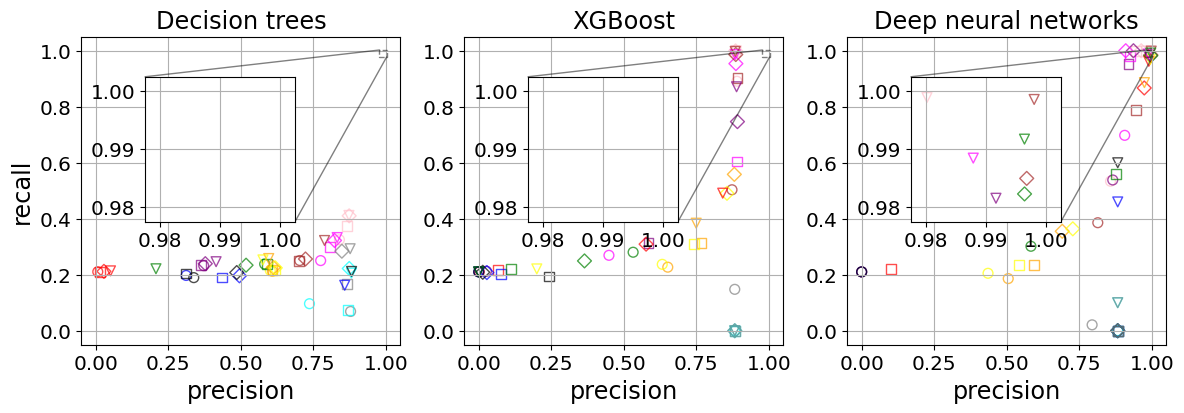

In [9]:
colors = np.array(["red","pink","blue","cyan","orange","yellow","purple","magenta","black","gray","brown","green"])

val1_unsafeprec_avgDT = np.zeros([len(datasets), len(save_dir)])
val1_unsafeprec_avgNN = np.zeros([len(datasets), len(save_dir)])
val1_unsafeprec_avgXG = np.zeros([len(datasets), len(save_dir)])
val1_unsaferecall_avgDT = np.zeros([len(datasets), len(save_dir)])
val1_unsaferecall_avgNN = np.zeros([len(datasets), len(save_dir)])
val1_unsaferecall_avgXG = np.zeros([len(datasets), len(save_dir)])

for data in range(len(datasets)): 
    for sizes in range(len(save_dir)):
        val1_unsafeprec_avgDT[data, sizes] = np.mean(resultsDT[save_dir[sizes]][datasets[data]][13,:])
        val1_unsafeprec_avgNN[data, sizes] = np.mean(resultsNN[save_dir[sizes]][datasets[data]][13,:])
        val1_unsafeprec_avgXG[data, sizes] = np.mean(resultsXG[save_dir[sizes]][datasets[data]][13,:])
        val1_unsaferecall_avgDT[data, sizes] = np.mean(resultsDT[save_dir[sizes]][datasets[data]][14,:])
        val1_unsaferecall_avgNN[data, sizes] = np.mean(resultsNN[save_dir[sizes]][datasets[data]][14,:])
        val1_unsaferecall_avgXG[data, sizes] = np.mean(resultsXG[save_dir[sizes]][datasets[data]][14,:])

## Create plot decision tree non-safe validation accuracy
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,4))
#fig.suptitle('Unsafe classification precision and recall for unsafe scenarios - test 2 (profiles + EV)', fontsize=16)
plt.setp((ax1,ax2,ax3), ylim=(-0.05,1.05), xlim=(-0.05,1.05))

ax1.scatter(val1_unsafeprec_avgDT[:, 0],val1_unsaferecall_avgDT[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
ax1.scatter(val1_unsafeprec_avgDT[:, 1],val1_unsaferecall_avgDT[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
ax1.scatter(val1_unsafeprec_avgDT[:, 2],val1_unsaferecall_avgDT[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
ax1.scatter(val1_unsafeprec_avgDT[:, 3],val1_unsaferecall_avgDT[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)

ax1.set(xlabel='precision', ylabel='recall',
       title='Decision trees')
ax1.grid()
# Create inset
axins1 = ax1.inset_axes([0.2, 0.4, 0.47, 0.47], xlim=(0.9775, 1.0025), ylim=(0.9775,1.0025), xticks=[0.98, 0.99, 1], yticks=[0.98, 0.99, 1])
axins1.scatter(val1_unsafeprec_avgDT[:, 0],val1_unsaferecall_avgDT[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
axins1.scatter(val1_unsafeprec_avgDT[:, 1],val1_unsaferecall_avgDT[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
axins1.scatter(val1_unsafeprec_avgDT[:, 2],val1_unsaferecall_avgDT[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
axins1.scatter(val1_unsafeprec_avgDT[:, 3],val1_unsaferecall_avgDT[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
axins1.grid()
ax1.indicate_inset_zoom(axins1, edgecolor="black", ls="--")
#ax1.legend(['a', 'a+SMOTE', 'b', 'b+SMOTE', 'c', 'c+SMOTE', 'd', 'd+SMOTE', 'e', 'e+SMOTE', 'f', 'f+SMOTE'], fontsize=7)

## Create plot xgboost
ax2.scatter(val1_unsafeprec_avgXG[:, 0],val1_unsaferecall_avgXG[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
ax2.scatter(val1_unsafeprec_avgXG[:, 1],val1_unsaferecall_avgXG[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
ax2.scatter(val1_unsafeprec_avgXG[:, 2],val1_unsaferecall_avgXG[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
ax2.scatter(val1_unsafeprec_avgXG[:, 3],val1_unsaferecall_avgXG[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
ax2.set(xlabel='precision',# ylabel='recall',
       title='XGBoost')
ax2.grid()
# Create inset
axins2 = ax2.inset_axes([0.2, 0.4, 0.47, 0.47], xlim=(0.9775, 1.0025), ylim=(0.9775,1.0025), xticks=[0.98, 0.99, 1], yticks=[0.98, 0.99, 1])
axins2.scatter(val1_unsafeprec_avgXG[:, 0],val1_unsaferecall_avgXG[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
axins2.scatter(val1_unsafeprec_avgXG[:, 1],val1_unsaferecall_avgXG[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
axins2.scatter(val1_unsafeprec_avgXG[:, 2],val1_unsaferecall_avgXG[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
axins2.scatter(val1_unsafeprec_avgXG[:, 3],val1_unsaferecall_avgXG[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
axins2.grid()
ax2.indicate_inset_zoom(axins2, edgecolor="black", ls="--")

## Create plot Deep neural networks
ax3.scatter(val1_unsafeprec_avgNN[:, 0],val1_unsaferecall_avgNN[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
ax3.scatter(val1_unsafeprec_avgNN[:, 1],val1_unsaferecall_avgNN[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
ax3.scatter(val1_unsafeprec_avgNN[:, 2],val1_unsaferecall_avgNN[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
ax3.scatter(val1_unsafeprec_avgNN[:, 3],val1_unsaferecall_avgNN[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
ax3.set(xlabel='precision',# ylabel='recall',
       title='Deep neural networks')
ax3.grid()
# Create inset
axins3 = ax3.inset_axes([0.2, 0.4, 0.47, 0.47], xlim=(0.9775, 1.0025), ylim=(0.9775,1.0025), xticks=[0.98, 0.99, 1], yticks=[0.98, 0.99, 1])
axins3.scatter(val1_unsafeprec_avgNN[:, 0],val1_unsaferecall_avgNN[:, 0], s=50, marker="o", edgecolors=colors, facecolors='none', alpha=0.7)
axins3.scatter(val1_unsafeprec_avgNN[:, 1],val1_unsaferecall_avgNN[:, 1], s=50, marker="s", edgecolors=colors, facecolors='none', alpha=0.7)
axins3.scatter(val1_unsafeprec_avgNN[:, 2],val1_unsaferecall_avgNN[:, 2], s=50, marker="D", edgecolors=colors, facecolors='none', alpha=0.7)
axins3.scatter(val1_unsafeprec_avgNN[:, 3],val1_unsaferecall_avgNN[:, 3], s=50, marker="v", edgecolors=colors, facecolors='none', alpha=0.7)
axins3.grid()
ax3.indicate_inset_zoom(axins3, edgecolor="black", ls="--")

legend_elements = [Line2D([0], [0], color=colors[0], lw=4, label='a'),
                   Line2D([0], [0], color=colors[1], lw=4, label='a+SMOTE'),
                   Line2D([0], [0], color=colors[2], lw=4, label='b'),
                   Line2D([0], [0], color=colors[3], lw=4, label='b+SMOTE'),
                   Line2D([0], [0], color=colors[4], lw=4, label='c'),
                   Line2D([0], [0], color=colors[5], lw=4, label='c+SMOTE'),
                   Line2D([0], [0], color=colors[6], lw=4, label='d'),
                   Line2D([0], [0], color=colors[7], lw=4, label='d+SMOTE'),
                   Line2D([0], [0], color=colors[8], lw=4, label='e'),
                   Line2D([0], [0], color=colors[9], lw=4, label='e+SMOTE'),
                   Line2D([0], [0], color=colors[10], lw=4, label='f'),
                   Line2D([0], [0], color=colors[11], lw=4, label='f+SMOTE')]
legend_elements2 = [Line2D([0], [0], marker='o', color='k', markerfacecolor='w', lw=0, label='$10^3$', markersize=8),
                   Line2D([0], [0], marker='s', color='k', markerfacecolor='w', lw=0, label='$10^4$', markersize=8),
                   Line2D([0], [0], marker='D', color='k', markerfacecolor='w', lw=0, label='$10^5$', markersize=8),
                   Line2D([0], [0], marker='v', color='k', markerfacecolor='w', lw=0, label='$10^6$', markersize=8)]
#fig.legend(handles=legend_elements, bbox_to_anchor=(0.415, 1.25), loc='upper center', ncol=6, title="Dataset generation strategy", fontsize=11)
#ax3.legend(handles=legend_elements2, bbox_to_anchor=(0.75, 1.49), loc='upper center', ncol=2, title="Train size", fontsize=11)  
fig.savefig("Results/unsafemetrics_test2.png", bbox_inches='tight')
plt.show()